In [8]:
# marker i need is gender, health, welath, race

# https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS&tableId=83779ENG&_theme=1092


import pandas as pd
import seaborn as sns



<AxesSubplot: xlabel='percentile', ylabel='value'>

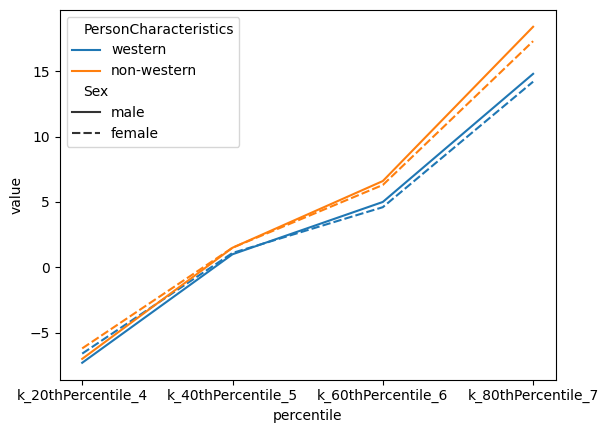

In [23]:
# 4000 women 
# 2012655 western
df = pd.read_csv("../data/ppd_intersect.csv", sep=';')
df = df.replace(4000, "female")
df = df.replace(3000, "male")
df = df.replace(2012655, "western")
df = df.replace(2012657, "non-western")
df = df.drop(["ID", "Periods"], axis = 1)
df = df.melt(id_vars=["Sex", "PersonCharacteristics"], 
        var_name="percentile", 
        value_name="value")



sns.lineplot(y="value", x="percentile", hue = "PersonCharacteristics", style = "Sex", data = df)